In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

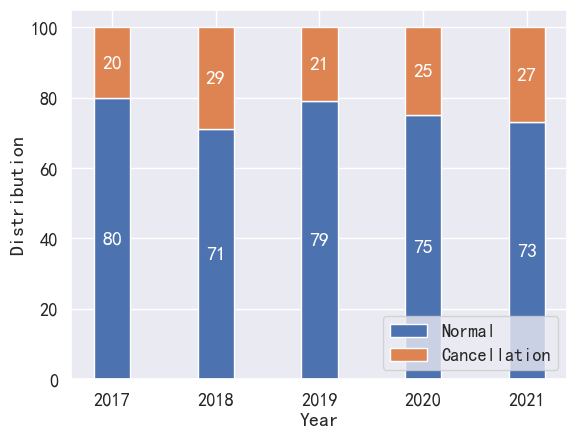

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# 定义数据
labels = [i for i in range(2017, 2022)]  # 标签
退订数据 = [20, 29, 21, 25, 27]
正常入住数据 = [100 - i for i in 退订数据]  # 正常入住数据

# 定义底部位置和高度
x = np.arange(len(labels))
width = 0.35

# 画图
fig, ax = plt.subplots()
rects1 = ax.bar(x, 正常入住数据, width, label='Normal')
rects2 = ax.bar(x, 退订数据, width, bottom=正常入住数据, label='Cancellation')

# 添加标签和标题
ax.set_ylabel('Distribution')
ax.set_xlabel('Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# 在每个柱子中间添加标签
for i, rect in enumerate(rects1):
    height = rect.get_height()
    xpos = rect.get_x() + rect.get_width() / 2.0
    ypos = height / 2.0
    ax.text(xpos, ypos, str(正常入住数据[i]), ha='center', va='center', color='white', fontweight='bold')
for i, rect in enumerate(rects2):
    height = rect.get_height()
    xpos = rect.get_x() + rect.get_width() / 2.0
    ypos = rect.get_y() + height / 2.0
    ax.text(xpos, ypos, str(退订数据[i]), ha='center', va='center', color='white', fontweight='bold')

# 酒店预订取消占比
plt.savefig('Proportion of hotel reservation cancellations.svg')
plt.show()


## 分类结果混淆矩阵

取消预订数据 1680.0
正常订单数据 6320.0
[[1450.008  229.992]
 [ 779.888 5540.112]]


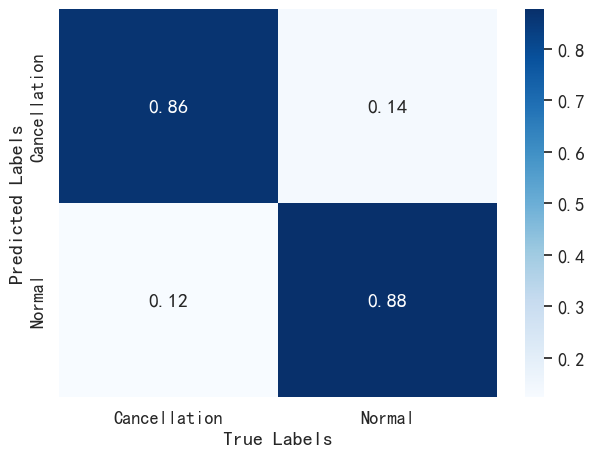

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define categories
categories = ['Cancellation', 'Normal']

# Create the confusion matrix
样本总数 = 8000
取消预订数据占比 = 0.21
print(f'取消预订数据 {取消预订数据占比 * 样本总数}')
print(f'正常订单数据 {(1 - 取消预订数据占比) * 样本总数}')
confusion_matrix = np.array([[样本总数 * 取消预订数据占比 * 0.8631, 样本总数 * 取消预订数据占比 * (1 - 0.8631)],
                             [样本总数 * (1 - 取消预订数据占比) * 0.1234,
                              样本总数 * (1 - 取消预订数据占比) * (1 - 0.1234)]])

print(confusion_matrix)

# Normalize the confusion matrix
normalized_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True)

# Plot the confusion matrix
title = '混淆矩阵'
# plt.figure(figsize=(8, 6))
sns.heatmap(normalized_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=categories, yticklabels=categories)
# plt.title(title)
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.tight_layout()
plt.savefig(f'{title}.svg')
plt.show()
# TP=1450 FP=229
# FN=779 TN=5540